# Python for Stock Trading

Python has been gaining significant traction in the financial industry over the past years. We can leverage the powerful functionality provided by a number of Python packages like ``pandas`` and ``matplotlib`` to develop and backtest a quantitative trading strategy. Specifically, we can easily download financial data from free online databases, manipulate the downloaded data and then create some basic technical indicators are used as the basis of many quantitative strategy. 

In this notebook, we will show how to design a simple stock trading strategy based on moving average using python. Note that this is a rule-based trading strategy, and it involves no machine learning techniques.

**Disclaimer: This notebook does not constitute any investment advice.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings("ignore")

## Get the data

We will need the ``pandas_datareadear`` package to get market data from a free online source such as Google Finance.

``
pip install pandas_datareader
``

In [2]:
import pandas_datareader as pdr

We would like to fetch all stock data from 01/01/2021 until 12/31/2022 for Apple Inc. (AAPL).

In [3]:
ticker = 'AAPL'
start = '2021-01-01'
end = '2022-12-31'

Use ``pandas_reader.data.DataReader`` to load the data from Google Finance by setting ``data_source = 'stooq'``.

In [4]:
stock = pdr.data.DataReader(name = ticker, data_source ='stooq', start = start, end = end)

In [5]:
stock.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-30,126.933,128.457,125.967,128.437,77929881
2022-12-29,126.519,128.981,126.262,128.120,76583912
2022-12-28,128.180,129.522,124.423,124.591,86431778
2022-12-27,129.869,129.899,127.240,128.536,69810179
2022-12-23,129.414,130.893,128.150,130.345,64556865
2022-12-22,132.808,133.013,128.802,130.709,78757289
2022-12-21,131.451,135.237,131.225,133.895,86927072
2022-12-20,129.879,131.718,128.397,130.779,78333125
2022-12-19,133.557,133.647,129.810,130.848,80518032


In [6]:
stock.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-08,129.359,129.555,127.219,128.982,107657946
2021-01-07,125.376,128.569,124.881,127.869,112182922
2021-01-06,124.745,127.997,123.454,123.670,158774542
2021-01-05,125.899,128.677,125.443,127.957,99986474
2021-01-04,130.422,130.510,123.828,126.410,146708294


We will use **open prices** only for our trading strategy.

In [7]:
data = stock.iloc[::-1]
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,130.422,130.510,123.828,126.410,146708294
2021-01-05,125.899,128.677,125.443,127.957,99986474
2021-01-06,124.745,127.997,123.454,123.670,158774542
2021-01-07,125.376,128.569,124.881,127.869,112182922
2021-01-08,129.359,129.555,127.219,128.982,107657946


In [8]:
data.drop(['Close', 'High', 'Low'], axis = 1, inplace= True)
data.head()

,Open,Volume
Date,,
2021-01-04,130.422,146708294
2021-01-05,125.899,99986474
2021-01-06,124.745,158774542
2021-01-07,125.376,112182922
2021-01-08,129.359,107657946


## Moving average

One of the oldest and simplest trading strategies that exist is the one that uses a moving average of the price (or returns) timeseries to proxy the recent trend of the price.

The idea is quite simple, yet powerful; if we use a (say) 100-day moving average of our price time-series, then a significant portion of the daily price noise will have been "averaged-out". Thus, we can can observe more closely the longer-term behaviour of the asset.

The so-called Exponential Moving Average (EMA) with the length of window (span) $M$ is defined as

$$\mathrm{EMA}(t) = (1-\alpha) \mathrm{EMA}(t-1) + \alpha p(t), \quad \mathrm{EMA}(t_0) = p(t_0)$$

where $p(t)$ is the price at time $t$ and $\alpha = \frac{2}{M+1}$ is called the decay parameter for the EMA.

For EMA calculations, we can use ``pandas``'s built-in ``ewm`` method.

In [9]:
data['5-day'] = data['Open'].ewm(span=5, adjust = False).mean()
data.head(10)

,Open,Volume,5-day
Date,,,
2021-01-04,130.422,146708294,130.422000
2021-01-05,125.899,99986474,128.914333
2021-01-06,124.745,158774542,127.524556
2021-01-07,125.376,112182922,126.808370
2021-01-08,129.359,107657946,127.658580
2021-01-11,126.192,103012724,127.169720
2021-01-12,125.512,94136901,126.617147
2021-01-13,125.770,90743803,126.334765
2021-01-14,127.751,92366402,126.806843


In [10]:
data.tail()

,Open,Volume,5-day
Date,,,
2022-12-23,129.414,64556865,132.169633
2022-12-27,129.869,69810179,131.402755
2022-12-28,128.180,86431778,130.328504
2022-12-29,126.519,76583912,129.058669
2022-12-30,126.933,77929881,128.350113


In [11]:
data['14-day'] = data['Open'].ewm(span=14, adjust = False).mean()
data.head()

,Open,Volume,5-day,14-day
Date,,,,
2021-01-04,130.422,146708294,130.422000,130.422000
2021-01-05,125.899,99986474,128.914333,129.818933
2021-01-06,124.745,158774542,127.524556,129.142409
2021-01-07,125.376,112182922,126.808370,128.640221
2021-01-08,129.359,107657946,127.658580,128.736058


Let us plot the three timeseries for Apple stock. 

In [12]:
price = data['Open']
ema14 = data['14-day']
ema5 = data['5-day']

In [13]:
price.head()

Date
2021-01-04    130.422
2021-01-05    125.899
2021-01-06    124.745
2021-01-07    125.376
2021-01-08    129.359
Name: Open, dtype: float64

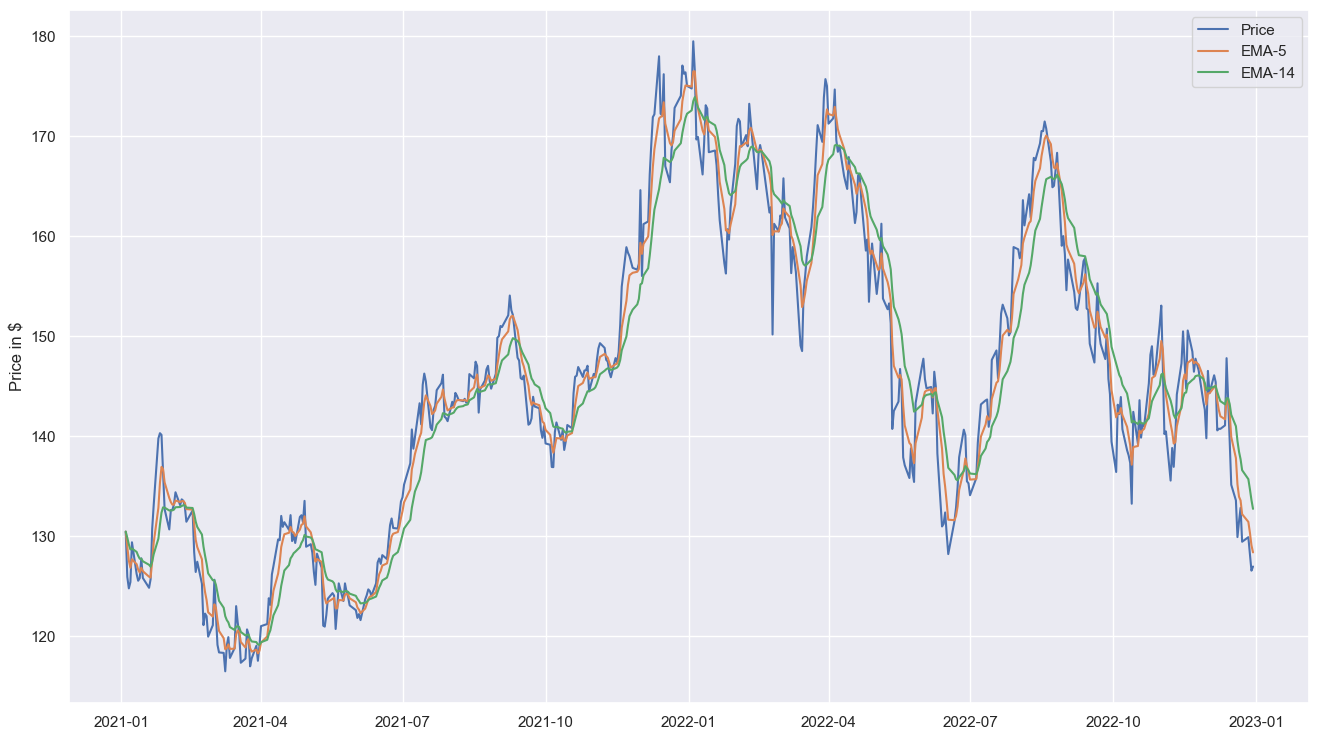

In [14]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(price, label = 'Price')
ax.plot(ema5, label = 'EMA-5')
ax.plot(ema14, label = 'EMA-14')


ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.grid(True)

## Trading strategy 

We use the moving averages calculated above to design a trading strategy by assuming that when a change in the long term behaviour of the stock occurs, the EMA-5 timeseries will react faster than the EMA-14 one. Therefore, we will consider the crossing of the two as potential trading signals.

1. When the EMA-5 timeseries crosses the EMA-14 timeseries from below, we will close any existing short position and go long (buy) one share of the stock at open price.

2. When the EMA-5 timeseries crosses the EMA-14 timeseries from above, we will close any existing long position and go short (sell) one share of the stock at open price.

#### Add 'signal' column

``signal`` = 1 means an uptrend with EMA5(t) > EMA14(t) and ``signal`` = -1 means a downtrend with EMA5(t) < EMA14(t).

In [15]:
data['signal'] = np.where(data['5-day'] > data['14-day'], 1, 0)
data.head(30)

,Open,Volume,5-day,14-day,signal
Date,,,,,
2021-01-04,130.422,146708294,130.422000,130.422000,0
2021-01-05,125.899,99986474,128.914333,129.818933,0
2021-01-06,124.745,158774542,127.524556,129.142409,0
2021-01-07,125.376,112182922,126.808370,128.640221,0
2021-01-08,129.359,107657946,127.658580,128.736058,0
2021-01-11,126.192,103012724,127.169720,128.396850,0
2021-01-12,125.512,94136901,126.617147,128.012204,0
2021-01-13,125.770,90743803,126.334765,127.713243,0
2021-01-14,127.751,92366402,126.806843,127.718277,0


In [16]:
data['signal'] = np.where(data['5-day'] < data['14-day'], -1, data['signal'])
data.head(30)

,Open,Volume,5-day,14-day,signal
Date,,,,,
2021-01-04,130.422,146708294,130.422000,130.422000,0
2021-01-05,125.899,99986474,128.914333,129.818933,-1
2021-01-06,124.745,158774542,127.524556,129.142409,-1
2021-01-07,125.376,112182922,126.808370,128.640221,-1
2021-01-08,129.359,107657946,127.658580,128.736058,-1
2021-01-11,126.192,103012724,127.169720,128.396850,-1
2021-01-12,125.512,94136901,126.617147,128.012204,-1
2021-01-13,125.770,90743803,126.334765,127.713243,-1
2021-01-14,127.751,92366402,126.806843,127.718277,-1


## Calculate returns

The widely-used (log) return on any day $t$ is defined as 

$$
\log \frac{p(t)}{p(t-1)} = \log(p(t)) -\log(p(t-1))
$$

We compare the return given by our EMA based strategy with that of the naive buy and hold one. We will first calculate the daily returns and then the accumulated returns.

For example, if we buy and hold on day 1 until day $T$, then the accumlated return in log scale is

$$
\log \frac{p(T)}{p(1)} = \log \prod_{t= 2}^T \frac{p(t)}{p(t-1)} = \sum_{t= 2}^T  \log \frac{p(t)}{p(t-1)} 
$$

In [17]:
data['return'] = -np.log(data['Open']).diff(-1)
data.head(10)

,Open,Volume,5-day,14-day,signal,return
Date,,,,,,
2021-01-04,130.422,146708294,130.422000,130.422000,0,-0.035295
2021-01-05,125.899,99986474,128.914333,129.818933,-1,-0.009208
2021-01-06,124.745,158774542,127.524556,129.142409,-1,0.005046
2021-01-07,125.376,112182922,126.808370,128.640221,-1,0.031274
2021-01-08,129.359,107657946,127.658580,128.736058,-1,-0.024787
2021-01-11,126.192,103012724,127.169720,128.396850,-1,-0.005403
2021-01-12,125.512,94136901,126.617147,128.012204,-1,0.002053
2021-01-13,125.770,90743803,126.334765,127.713243,-1,0.015628
2021-01-14,127.751,92366402,126.806843,127.718277,-1,-0.015477


In [18]:
data['strategy_return'] = data['return']*data['signal']
data.head()

,Open,Volume,5-day,14-day,signal,return,strategy_return
Date,,,,,,,
2021-01-04,130.422,146708294,130.422000,130.422000,0,-0.035295,-0.000000
2021-01-05,125.899,99986474,128.914333,129.818933,-1,-0.009208,0.009208
2021-01-06,124.745,158774542,127.524556,129.142409,-1,0.005046,-0.005046
2021-01-07,125.376,112182922,126.808370,128.640221,-1,0.031274,-0.031274
2021-01-08,129.359,107657946,127.658580,128.736058,-1,-0.024787,0.024787


We act only when the trend changes, i.e., ``signal`` changes from -1 to 1, or from 1 to -1. To catch the trend, we create a ``entry`` column taking the difference between any two consecutive signals.

In [19]:
data['entry'] = data['signal'].diff()
data.head(30)

,Open,Volume,5-day,14-day,signal,return,strategy_return,entry
Date,,,,,,,,
2021-01-04,130.422,146708294,130.422000,130.422000,0,-0.035295,-0.000000,NaN
2021-01-05,125.899,99986474,128.914333,129.818933,-1,-0.009208,0.009208,-1.0
2021-01-06,124.745,158774542,127.524556,129.142409,-1,0.005046,-0.005046,0.0
2021-01-07,125.376,112182922,126.808370,128.640221,-1,0.031274,-0.031274,0.0
2021-01-08,129.359,107657946,127.658580,128.736058,-1,-0.024787,0.024787,0.0
2021-01-11,126.192,103012724,127.169720,128.396850,-1,-0.005403,0.005403,0.0
2021-01-12,125.512,94136901,126.617147,128.012204,-1,0.002053,-0.002053,0.0
2021-01-13,125.770,90743803,126.334765,127.713243,-1,0.015628,-0.015628,0.0
2021-01-14,127.751,92366402,126.806843,127.718277,-1,-0.015477,0.015477,0.0


We change the position from short to long if ``entry``= 2 and from long to short if ``entry`` = -2.

In [20]:
long = data[['Open']][data['entry'] ==2]
long.head(10)

,Open
Date,
2021-01-21,130.696
2021-04-05,121.177
2021-06-09,124.646
2021-10-19,144.259
2022-02-01,171.023
2022-03-22,162.874
2022-06-01,147.727
2022-06-08,146.426
2022-06-27,140.627


In [21]:
short = data[['Open']][data['entry'] <0]
short.head(10)

,Open
Date,
2021-01-05,125.899
2021-02-12,131.417
2021-05-05,126.390
2021-09-15,145.786
2022-01-07,169.921
2022-02-18,167.113
2022-04-12,165.337
2022-06-07,142.252
2022-06-10,138.247


In [22]:
data[['Open']][data['entry'] ==-2].head()

,Open
Date,
2021-02-12,131.417
2021-05-05,126.390
2021-09-15,145.786
2022-01-07,169.921
2022-02-18,167.113


In [23]:
short.tail(10)

,Open
Date,
2022-01-07,169.921
2022-02-18,167.113
2022-04-12,165.337
2022-06-07,142.252
2022-06-10,138.247
2022-06-30,135.260
2022-08-29,159.030
2022-11-04,140.457
2022-11-29,142.632


Plot trades on time series during years 2021-2022:

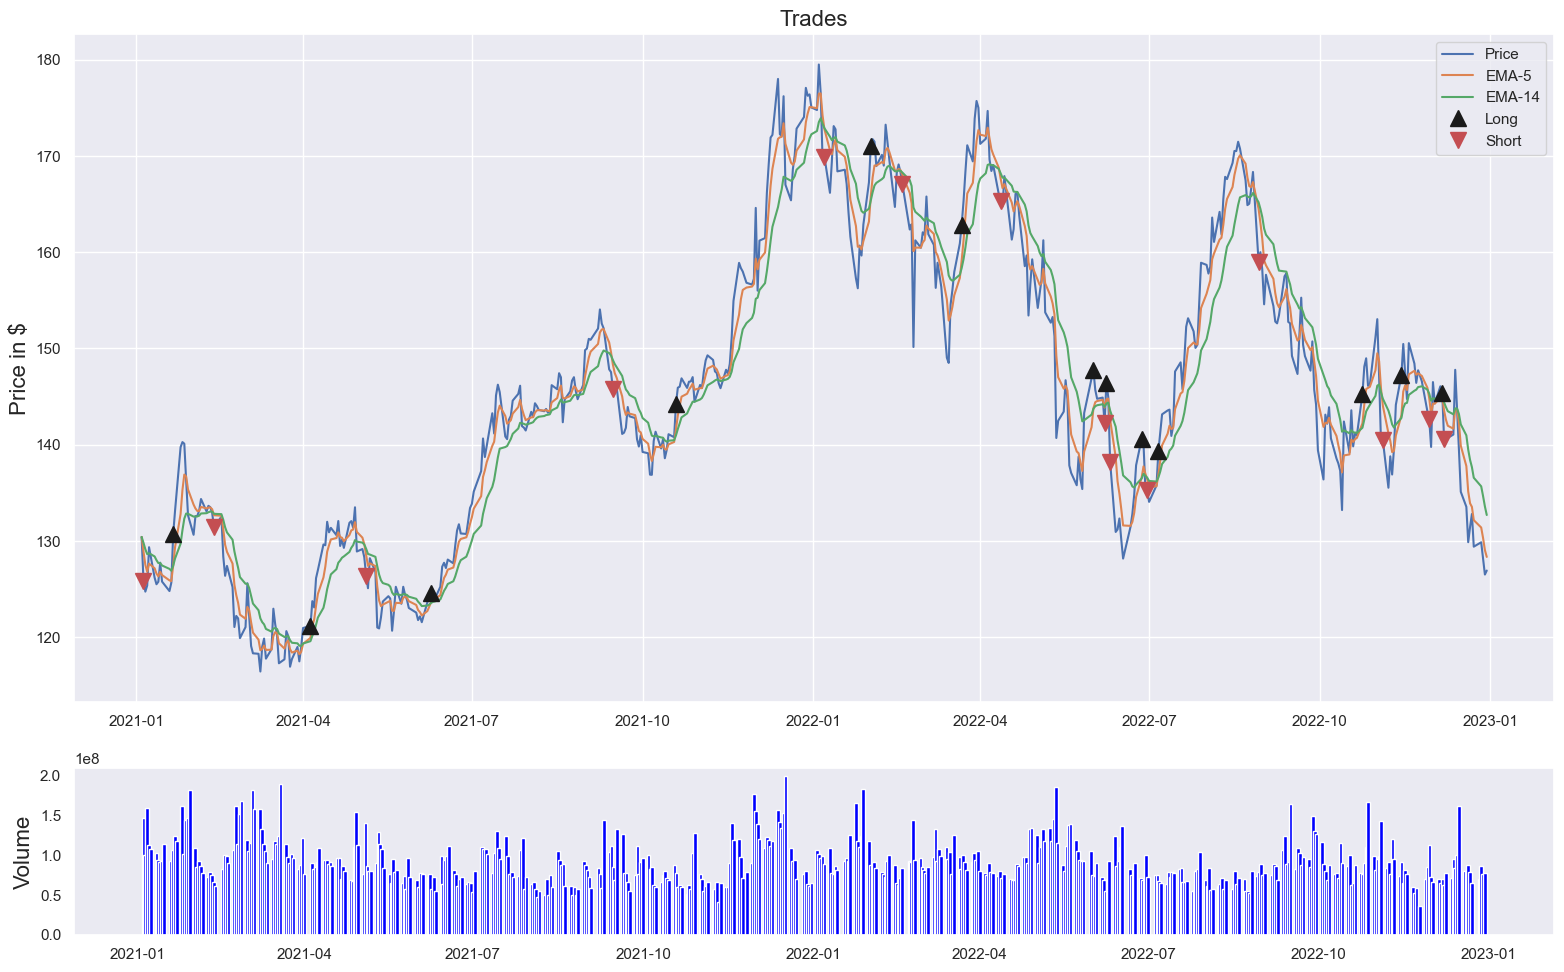

In [24]:
fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [4, 1]}, figsize = (16,10))
fig.tight_layout(pad=2)

ax[0].plot(price, label = 'Price')
ax[0].plot(ema5, label = 'EMA-5')
ax[0].plot(ema14, label = 'EMA-14')
ax[0].plot(long, '^', color = 'k', markersize= 12, label = 'Long')
ax[0].plot(short, 'v', color = 'r', markersize= 12, label = 'Short')

ax[0].legend(loc='best')
# ax[0].set_xticks([])
ax[0].set_ylabel('Price in $', fontsize = 16)
ax[0].set_title('Trades', fontsize = 16)


ax[1].bar(data.index, height = data['Volume'], width=2, color='blue')
ax[1].set_ylabel('Volume', fontsize = 16)
ax[1].grid(False)

Plot the accumulated return rates (in regular scale) over the trading period. Here we use the relation

$$
\frac{p(T)}{p(1)} = \prod_{t=2}^T \exp \left(\log \frac{p(t)}{p(t-1)}\right)
$$



Text(0.5, 1.0, 'Returns')

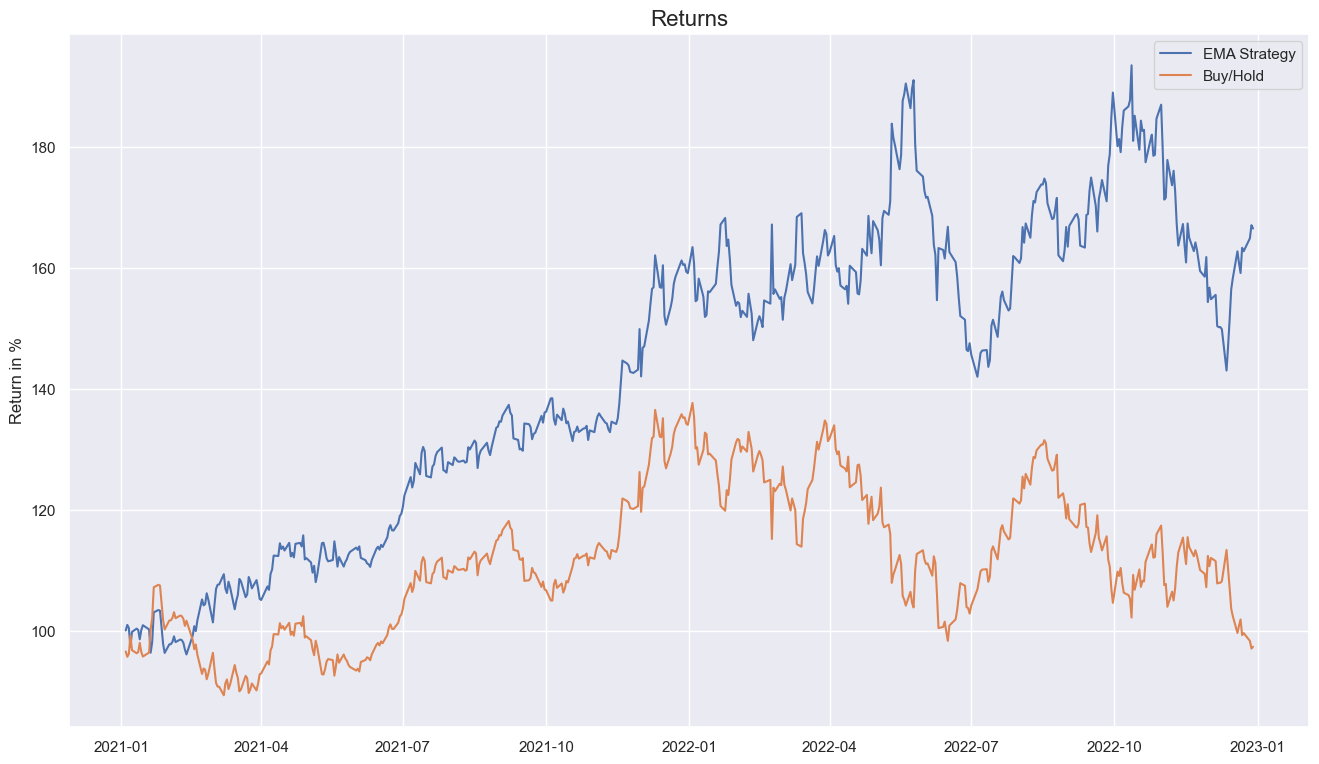

In [25]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(100*np.exp(data['strategy_return']).cumprod(), label = 'EMA Strategy')
ax.plot(100*np.exp(data['return']).cumprod(), label = 'Buy/Hold')

ax.legend(loc='best')
ax.set_ylabel('Return in %')
ax.set_title('Returns', fontsize = 16)

**Remark**: In practice, factors that take away the profit should be taken into account, such as commission fees and paid interets on an open short position.